In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [5]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1], [-1, -1], [1, -1], [-1, 1]],
                                       shuffle=True,
                                       cluster_std = 0.3)
x_test , y_test = make_blobs(n_samples=20, n_features=n_dim,
                             centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                             shuffle=True, cluster_std=0.3)

Q : blob이란 개념이 뭘까?


In [6]:
def label_map(y_, from_ , to_):
  y = numpy.copy(y_)
  for f in from_:
    y[y_ == f] = to_
  return y

In [7]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [9]:
def vis_data(x,y = None, c = 'r'):
  if y is None:
    y = [None] * len(x)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0], x_[1], "*",makerfacecolor='none', makerededgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

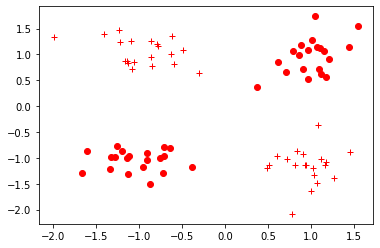

In [10]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [11]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

convert numpy vector to pytorch tensor 

In [14]:
class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid()
  
  def forward(self, input_tensor):
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

In [16]:
model = NeuralNet(2, 5)
LR = 0.03
criterion = torch.nn.BCELoss()

In [29]:
EPOCHS = 20000

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr=LR)



```
for i in range(0,40000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
```
앞선 예제와 같이, 결국에는 새 가중치 = 가중치 - 학습률 * 가중치에 대한 기울기   



In [31]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print(type(test_loss_before))
print("before training, test loss is {}".format(test_loss_before)) # item 안해도 뜨는데?
print("before training, test loss is {}".format(test_loss_before.item()))

<class 'torch.Tensor'>
before training, test loss is 0.06550328433513641
before training, test loss is 0.06550328433513641


loss가 0.7이다. 100 번 찍어 70번은 틀린다는 뜻이다

In [32]:
for epoch in range(EPOCHS):
  model.train()
  optimizer.zero_grad()
  train_output = model(x_train)
  train_loss = criterion(train_output.squeeze(), y_train)
  if epoch % 100 == 0:
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()
  optimizer.step()

Train loss at 0 is 0.06040669605135918
Train loss at 100 is 0.05656857416033745
Train loss at 200 is 0.053182344883680344
Train loss at 300 is 0.050174396485090256
Train loss at 400 is 0.04749162495136261
Train loss at 500 is 0.045079492032527924
Train loss at 600 is 0.04289936274290085
Train loss at 700 is 0.040918800979852676
Train loss at 800 is 0.03911212831735611
Train loss at 900 is 0.03745710849761963
Train loss at 1000 is 0.03593558818101883
Train loss at 1100 is 0.03453456610441208
Train loss at 1200 is 0.03323996439576149
Train loss at 1300 is 0.03203771263360977
Train loss at 1400 is 0.03091828152537346
Train loss at 1500 is 0.029873177409172058
Train loss at 1600 is 0.02889532409608364
Train loss at 1700 is 0.027978431433439255
Train loss at 1800 is 0.027116501703858376
Train loss at 1900 is 0.026304686442017555
Train loss at 2000 is 0.025538558140397072
Train loss at 2100 is 0.024814359843730927
Train loss at 2200 is 0.02412862703204155
Train loss at 2300 is 0.023478340357

=================================================  
학습 끝 , 성능시험

In [33]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print("After training , test loss is {}:".format(test_loss.item()))

After training , test loss is 0.004065272863954306:


In [35]:
torch.save(model.state_dict(), '/content/drive/MyDrive/torch_tutorial/3min_torch/3ch_ann/model1.pt') #이거 예외처리 어떻게 해야할까?
print('state_dict format of the model : {}'.format(model.state_dict())) 

state_dict format of the model : OrderedDict([('linear_1.weight', tensor([[-0.1547,  0.0160],
        [ 3.4390,  1.3650],
        [ 1.3345, -1.0129],
        [-1.7406, -2.7814],
        [ 2.5364, -1.8601]])), ('linear_1.bias', tensor([-0.6498,  0.2899, -0.1218,  0.1245, -0.2553])), ('linear_2.weight', tensor([[ 0.1082, -3.6502,  1.4503, -3.2257,  3.0413]])), ('linear_2.bias', tensor([4.7260]))])
